<a href="https://colab.research.google.com/github/Lavanya-Srinivas214/NND/blob/main/body_parts_recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: openai/clip-vit-base-patch32
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
vision_model.embeddings.position_ids | UNEXPECTED |  | 
text_model.embeddings.position_ids   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Upload a baby body-part image


Saving hand.jpg to hand (2).jpg


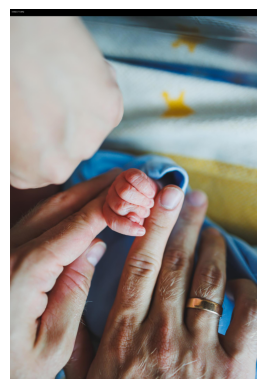

In [3]:
!pip install transformers -q

import torch
from PIL import Image, ImageDraw
from transformers import CLIPProcessor, CLIPModel
from google.colab import files
import io
import matplotlib.pyplot as plt

# Load CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Baby body parts
body_parts = ["face", "hand", "arm", "leg", "foot", "torso"]
candidate_labels = [f"a photo of a baby {part}" for part in body_parts]

# Upload image
print("Upload a baby body-part image")
uploaded = files.upload()

if uploaded:
    filename = list(uploaded.keys())[0]
    image = Image.open(io.BytesIO(uploaded[filename])).convert("RGB")

    # CLIP prediction
    inputs = processor(
        text=candidate_labels,
        images=image,
        return_tensors="pt",
        padding=True
    )

    with torch.no_grad():
        outputs = model(**inputs)

    probs = outputs.logits_per_image.softmax(dim=1)
    max_prob, idx = torch.max(probs, dim=1)

    label = body_parts[idx.item()].upper()
    confidence = max_prob.item() * 100

    # Draw result on image
    draw = ImageDraw.Draw(image)
    text = f"{label} ({confidence:.2f}%)"
    draw.rectangle((0, 0, image.width, 40), fill="black")
    draw.text((10, 10), text, fill="white")

    # Show output image
    plt.imshow(image)
    plt.axis("off")
    plt.show()

else:
    print("No image uploaded")
